In [ ]:
%reset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [3]:
tdat = '/gpfs/home/gdg21vsa/mai_workspace/test_data/TOM12_TJ_GEA0/ORCA2_1m_19900101_19901231_ptrc_T.nc'

tw = xr.open_dataset(tdat)

tw

<xarray.Dataset>
Dimensions:               (y: 149, x: 182, deptht: 31, axis_nbounds: 2,
                           time_counter: 12)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 5.0 15.0 25.0 ... 4.75e+03 5.25e+03
    time_centered         (time_counter) object ...
  * time_counter          (time_counter) object 1990-01-16 12:00:00 ... 1990-...
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/34)
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    Alkalini              (time_counter, deptht, y, x) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) object ...
    time_counter_bounds   (time_counter, axis_nbounds) object ...
    O2                    (time_counter, deptht, y, x) float32 ...
    DIC                   (time_counter, deptht, y, x) float32 ...
    ...                    ...
    BSi                   (time_counter, deptht, y, x) float32 ...
    GON                   (time_counter, deptht, y, x) float32 ...
    C11                   (time_counter, deptht, y, x) float32 ...
    B14B                  (time_counter, deptht, y, x) float32 ...
    C14B                  (time_counter, deptht, y, x) float32 ...
    D14B                  (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         ORCA2_1m_19900101_19901231
    description:  planktom sms variables
    title:        planktom sms variables
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2023-Jun-19 23:39:22 BST

Text(0.5, 1.0, 'Alkalini - DIC')

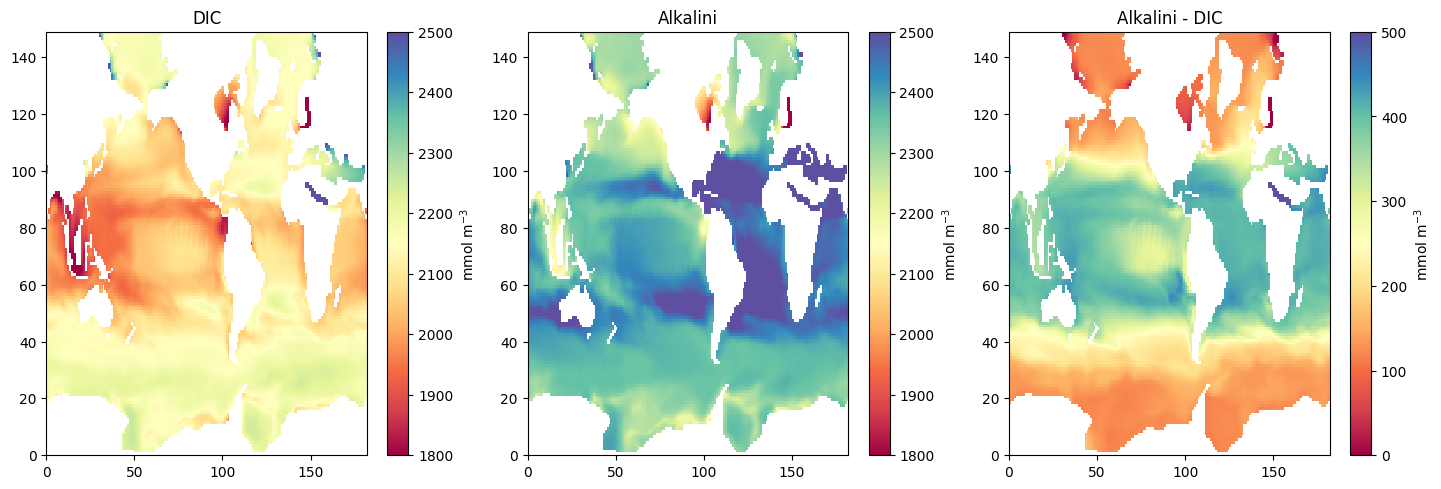

In [4]:
fact = 1e6
scal = 1.1
fig, axs = plt.subplots(1,3, figsize=(16*scal, 5*scal), facecolor='w', edgecolor='k')
axs = axs.ravel()
tlab = 'mmol m$^{-3}$'
tvar = 'DIC'
tdic = tw[tvar].values* fact
tdic[tdic == 0] = np.nan
w = axs[0].pcolormesh(tdic[0,0,:,:], cmap = 'Spectral', vmin = 1800, vmax = 2500)
plt.colorbar(w, label = tlab, ax = axs[0])
axs[0].set_title(tvar)

tlab = 'mmol m$^{-3}$'
tvar = 'Alkalini'
tdic = tw[tvar].values* fact
tdic[tdic == 0] = np.nan
w = axs[1].pcolormesh(tdic[0,0,:,:], cmap = 'Spectral', vmin = 1800, vmax = 2500)
plt.colorbar(w, label = tlab, ax = axs[1])
axs[1].set_title(tvar)


tlab = 'mmol m$^{-3}$'
tvar = 'DIC'
tdic = tw[tvar].values* fact
tvar2 = 'Alkalini'
tdic2 = tw[tvar2].values* fact
tdic3 = tdic2 - tdic #Alkalinity- DIC
tdic3[tdic3 == 0] = np.nan
w = axs[2].pcolormesh(tdic3[0,0,:,:], cmap = 'Spectral', vmin = -0, vmax = 500)
plt.colorbar(w, label = tlab, ax = axs[2])
axs[2].set_title('Alkalini - DIC')

# Module: TOM12_TJ_GEA0

In [8]:
import glob

def make_yearlist(yrst, yrend, dtype, tr, baseDir):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

baseDir = '/gpfs/data/greenocean/software/runs/'
tr = 'TOM12_TJ_GEA0'
yrst = 1990
yrend = 2000
dtype = 'ptrc'

tylist = make_yearlist(yrst, yrend, dtype, tr, baseDir)

tdat = xr.open_mfdataset(tylist)
tw = tdat

Text(0.5, 1.0, 'Alkalini - DIC')

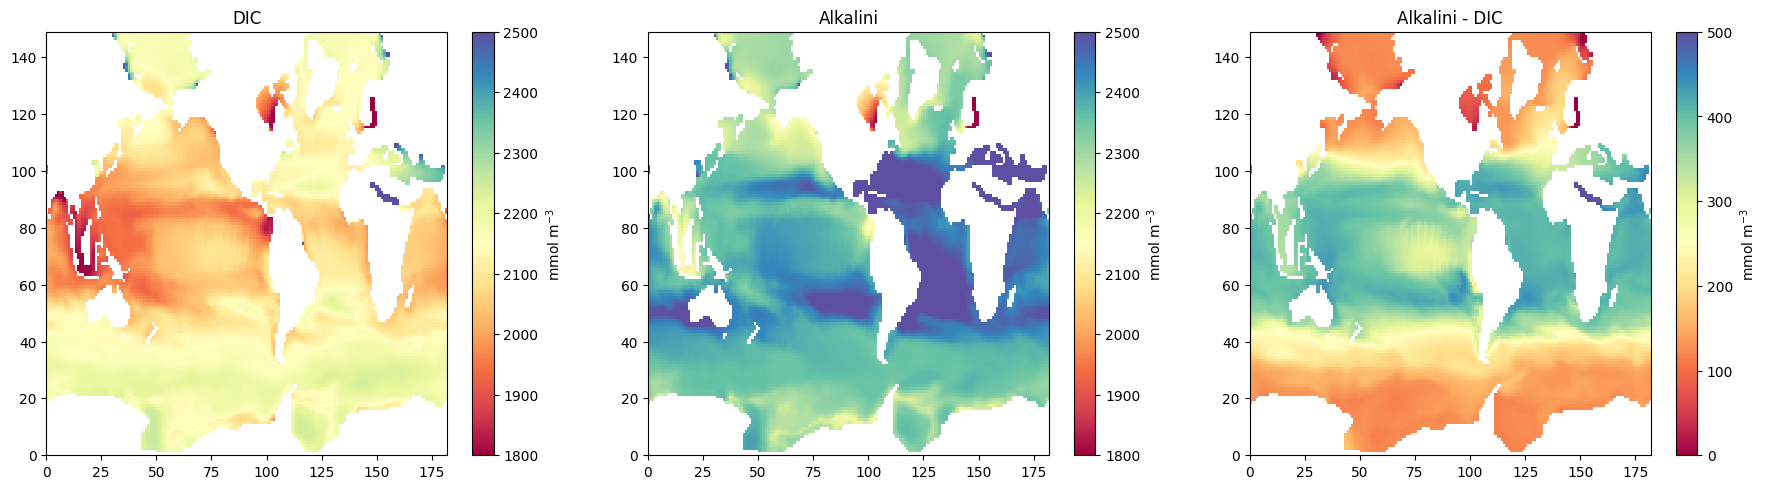

In [9]:
fact = 1e6
scal = 1.1
fig, axs = plt.subplots(1,3, figsize=(20*scal, 5*scal), facecolor='w', edgecolor='k')
axs = axs.ravel()
tlab = 'mmol m$^{-3}$'
tvar = 'DIC'
tdic = tw[tvar].values* fact
tdic[tdic == 0] = np.nan
w = axs[0].pcolormesh(tdic[0,0,:,:], cmap = 'Spectral', vmin = 1800, vmax = 2500)
plt.colorbar(w, label = tlab, ax = axs[0])
axs[0].set_title(tvar)

tlab = 'mmol m$^{-3}$'   # == 'umol/L'
tvar = 'Alkalini'
tdic = tw[tvar].values* fact
tdic[tdic == 0] = np.nan
w = axs[1].pcolormesh(tdic[0,0,:,:], cmap = 'Spectral', vmin = 1800, vmax = 2500)
plt.colorbar(w, label = tlab, ax = axs[1])
axs[1].set_title(tvar)


tlab = 'mmol m$^{-3}$' 
tvar = 'DIC'
tdic = tw[tvar].values* fact
tvar2 = 'Alkalini'
tdic2 = tw[tvar2].values* fact
tdic3 = tdic2 - tdic #Alkalinity- DIC

tdic3[tdic3 == 0] = np.nan
w = axs[2].pcolormesh(tdic3[0,0,:,:], cmap = 'Spectral', vmin = -0, vmax = 500)
plt.colorbar(w, label = tlab, ax = axs[2])
axs[2].set_title('Alkalini - DIC')